## Demo of the Supervised Learning Steps with A Simple Classification Task

### Import required modules and load data file

In [1]:
import numpy as np
import matplotlib.pyplot as plt, matplotlib.image as mpimg
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline

labeled_images = pd.read_csv('..\\data\\digits_train.csv')

### Preview the first five row of the origninal dataset 

In [2]:
labeled_images.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Examing the data, view first 25 images

C:\Users\micha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


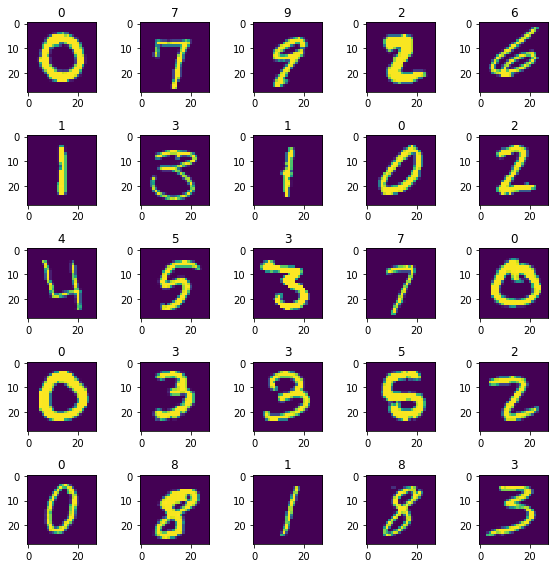

In [3]:
import math
f,ax=plt.subplots(5,5,figsize=(8,8)) #set up a 5 by 5 plotting area
for i in range (1,26):
    img=labeled_images.iloc[i,1:].as_matrix()#convert pandas datafrme into numpy arrays
    img=img.reshape((28,28)) #reshape into 28 by 28 pixels
    n=math.ceil(i/5)-1 #math.ceil to round up
    m=[0,1,2,3,4]*5
    ax[m[i-1], n].imshow(img)
    ax[m[i-1], n].set_title(labeled_images.iloc[i,0])
f.tight_layout()

### Shape of the input data set

In [4]:
labeled_images.shape

(42000, 785)

### Create train-test split

In [5]:
#select images features from the second column to the last column, and only the first 2000 smaples(rows).
X = labeled_images.iloc[:2000,1:]

#select the first column which is the label, or the digit, and only the first 2000 smaples(rows).
y = labeled_images.iloc[:2000,:1].squeeze()# with .squeeze(), the pandas one column dataframe is turned into a series 

print('The original input dataset shape is: ', labeled_images.shape)
print('The X dataset shape is: ',X.shape)
print('The y dataset shape is: ', y.shape)

The original input dataset shape is:  (42000, 785)
The X dataset shape is:  (2000, 784)
The y dataset shape is:  (2000,)


**train_test_split(X,y,train_size=0.8) split X, y into X_train,X_test,y_train,y_test, by default the split is 75% to 25% for train to test, but you can change the rate with train_size, here it is set 80% as train, and 20% as test.**

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.8, random_state=0)
print('The X_train dataset shape is: ', X_train.shape)
print('The y_train dataset shape is: ', y_train.shape)
print('The X_test dataset shape is: ', X_test.shape)
print('The y_test dataset shape is: ', y_test.shape)

The X_train dataset shape is:  (1600, 784)
The y_train dataset shape is:  (1600,)
The X_test dataset shape is:  (400, 784)
The y_test dataset shape is:  (400,)


C:\Users\micha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Inspect the X_train,X_test,y_train,y_test data sets.

In [7]:
X_train.head(20)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
708,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
532,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
251,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y_train.head(20)

582     7
159     6
1827    3
318     8
708     1
532     6
485     8
251     0
1490    0
1433    1
190     2
1837    8
616     9
1484    4
578     7
351     4
1218    1
1422    1
1362    4
942     3
Name: label, dtype: int64

In [9]:
X_test.head(20)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
405,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
731,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1754,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1533,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1303,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1857,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y_test.head(20)

405     5
1190    8
1132    6
731     2
1754    0
1178    8
1533    2
1303    0
1857    3
18      7
1266    6
1543    7
249     1
191     1
721     9
1896    3
452     7
1947    2
1544    0
1205    7
Name: label, dtype: int64

### Create classifier object

We first try multiclass logistic regression classifier.

In [11]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

### Train the classifier (fit the estimator) using the training data

In [12]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Find out the accuracy of training model

In [13]:
clf.score(X_train, y_train)

1.0

### Estimate the accuracy of the classifier on future data, using the test data

In [14]:
clf.score(X_test, y_test)

0.835

### Use the trained classifier model to classify (predict) new, previously unseen data

In [15]:
predicted_y=clf.predict(X_test)

In [16]:
for i in range(10):
    print('The image is: {0}, and the predicted digit is: {1}'.format(
        y_test.reset_index(drop=True)[i],predicted_y[i]))#use reset_index to change the index to [0,..n], drop=True requires not keep the original index

The image is: 5, and the predicted digit is: 5
The image is: 8, and the predicted digit is: 8
The image is: 6, and the predicted digit is: 6
The image is: 2, and the predicted digit is: 2
The image is: 0, and the predicted digit is: 0
The image is: 8, and the predicted digit is: 8
The image is: 2, and the predicted digit is: 2
The image is: 0, and the predicted digit is: 0
The image is: 3, and the predicted digit is: 3
The image is: 7, and the predicted digit is: 7


### Can you calculate the accuracy score yourself?

You can compare y_test, and predicted_y, and the accuracy score = number of correct classification/number of all samples in the y_test

In [17]:
y_test.shape

(400,)

In [18]:
predicted_y.shape

(400,)

In [19]:
accuracy_score=np.mean(predicted_y==y_test)
print('The accuracy of score of the test data is: {:.2%}'.format(accuracy_score))

The accuracy of score of the test data is: 83.50%


### Preview 1: Which model performs the best with default parameters?

Let's run a number of classification models with their default parameters.
There are:
+ K-Nearest Neighbors
+ Logistic Regression Classifier
+ Ridge Classifier
+ Lasso Classifier
+ SGD Classifier
+ ElasticNet Classifier
+ Support Vector Machine
+ Naive Bayes Multinomial Classifier
+ Decision Tree Classifier
+ Ensembles of Decision Trees (Random Forest classifier)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,RidgeClassifier,LassoCV,SGDClassifier,ElasticNetCV
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [21]:
classifier_names=['K-Nearest Neighbors Classifier',
                    'Logistic Regression Classifier',
                    'Ridge Classifier',
                    'Lasso Classifier',
                    'SGD Classifier',
                    'ElasticNet Classifier',
                    'Support Vector Machine',
                    'Naive Bayes Multinomial Classifier',
                    'Decision Tree Classifier',
                    'Random Forest classifier']

In [22]:
classifiers = [ KNeighborsClassifier(),
                LogisticRegression(),
                RidgeClassifier(),
                LassoCV(),
                SGDClassifier(),           
                ElasticNetCV(cv=10, random_state=0),
                SVC(),
                MultinomialNB(),
                DecisionTreeClassifier(),           
                RandomForestClassifier()
    ]

In [23]:
models=zip(classifier_names,classifiers)#combine two lists together as a tuple
results=[]#create an empty list to store the results of each classifier

for name,clf in models:
    model=clf.fit(X_train,y_train)#fit the model
    accuracy_score_train=clf.score(X_train, y_train)
    accuracy_score_test=clf.score(X_test, y_test)
    results.append((name,accuracy_score_train,accuracy_score_test))
    
for n,a,b in results:    #print the results
    print('{0} has an accuracy score of :{1:.2%} on train data, and {2:.2%} on test data.'.format(n,a,b))


C:\Users\micha\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


K-Nearest Neighbors Classifier has an accuracy score of :93.00% on train data, and 87.00% on test data.
Logistic Regression Classifier has an accuracy score of :100.00% on train data, and 83.50% on test data.
Ridge Classifier has an accuracy score of :97.38% on train data, and 74.50% on test data.
Lasso Classifier has an accuracy score of :63.93% on train data, and 53.54% on test data.
SGD Classifier has an accuracy score of :93.12% on train data, and 84.00% on test data.
ElasticNet Classifier has an accuracy score of :66.39% on train data, and 53.17% on test data.
Support Vector Machine has an accuracy score of :100.00% on train data, and 12.00% on test data.
Naive Bayes Multinomial Classifier has an accuracy score of :84.38% on train data, and 80.50% on test data.
Decision Tree Classifier has an accuracy score of :100.00% on train data, and 68.50% on test data.
Random Forest classifier has an accuracy score of :99.94% on train data, and 81.75% on test data.


In [24]:
results.sort(key=lambda x:x[1],reverse=True)#sort the results by accuracy score on training data
results_pd=pd.DataFrame(results,
                        columns=['Classifier','Score on training data','Score on test data'
                                ])#turn list into pandas dataframe for better display

In [25]:
results_pd

,Classifier,Score on training data,Score on test data
0,Logistic Regression Classifier,1.000000,0.835000
1,Support Vector Machine,1.000000,0.120000
2,Decision Tree Classifier,1.000000,0.685000
3,Random Forest classifier,0.999375,0.817500
4,Ridge Classifier,0.973750,0.745000
5,SGD Classifier,0.931250,0.840000
6,K-Nearest Neighbors Classifier,0.930000,0.870000
7,Naive Bayes Multinomial Classifier,0.843750,0.805000
8,ElasticNet Classifier,0.663894,0.531748
9,Lasso Classifier,0.639250,0.535359


In [26]:
results_pd.sort_values('Score on test data',ascending=[0])#sort the results by accuracy scores on test data

,Classifier,Score on training data,Score on test data
6,K-Nearest Neighbors Classifier,0.930000,0.870000
5,SGD Classifier,0.931250,0.840000
0,Logistic Regression Classifier,1.000000,0.835000
3,Random Forest classifier,0.999375,0.817500
7,Naive Bayes Multinomial Classifier,0.843750,0.805000
4,Ridge Classifier,0.973750,0.745000
2,Decision Tree Classifier,1.000000,0.685000
9,Lasso Classifier,0.639250,0.535359
8,ElasticNet Classifier,0.663894,0.531748
1,Support Vector Machine,1.000000,0.120000


### Preview 2: Scaling X feature matrix 

#### MinMax Scaler does the following:

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_scaled = X_std * (max - min) + min

#### Standard Scaler scale data to mean=0, std=1.

**MaxAbsScaler** works in a very similar fashion, but scales in a way that the training data lies within the range [-1, 1] by dividing through the largest maximum value in each feature.

In [27]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,MaxAbsScaler

scaler_names=['MinMax Scaler','Standard Scaler','MaxAbs Scaler']

scalers=[MinMaxScaler(),StandardScaler(),MaxAbsScaler()]

In [28]:
results=[]
scales=zip(scaler_names,scalers)
for sn,sc in scales:
    scaler=sc.fit(X_train)
    X_train_scaled=sc.transform(X_train)
    X_test_scaled=sc.transform(X_test)
    models=zip(classifier_names,classifiers)
    for name,clf in models:
        try:#use try to handle exception(erros), there are some models that require the input has to be non-negative, we just skip that model
            model=clf.fit(X_train_scaled,y_train)
            accuracy_score_train=clf.score(X_train_scaled, y_train)
            accuracy_score_test=clf.score(X_test_scaled, y_test)
            results.append((sn,name,accuracy_score_train,accuracy_score_test))
        except:continue
            
results.sort(key=lambda x:x[2],reverse=True)

for s,n,a,b in results:    
    print('With {0}, {1} has an accuracy score of :{2:.2%} on train data, and {3:.2%} on test data.'.format(s,n,a,b))


C:\Users\micha\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\micha\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\micha\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both a

With MinMax Scaler, Decision Tree Classifier has an accuracy score of :100.00% on train data, and 68.50% on test data.
With Standard Scaler, Logistic Regression Classifier has an accuracy score of :100.00% on train data, and 84.25% on test data.
With Standard Scaler, Decision Tree Classifier has an accuracy score of :100.00% on train data, and 67.75% on test data.
With MaxAbs Scaler, Decision Tree Classifier has an accuracy score of :100.00% on train data, and 68.75% on test data.
With MinMax Scaler, Random Forest classifier has an accuracy score of :99.94% on train data, and 85.25% on test data.
With MaxAbs Scaler, Random Forest classifier has an accuracy score of :99.88% on train data, and 81.25% on test data.
With Standard Scaler, Random Forest classifier has an accuracy score of :99.81% on train data, and 82.00% on test data.
With MinMax Scaler, Logistic Regression Classifier has an accuracy score of :99.50% on train data, and 87.25% on test data.
With MaxAbs Scaler, Logistic Regre

In [29]:
results_pd=pd.DataFrame(results,
                        columns=['Scaler','Classifier','Score on training data','Score on test data'
                                ])#turn list into pandas dataframe for better display

In [30]:
results_pd

,Scaler,Classifier,Score on training data,Score on test data
0,MinMax Scaler,Decision Tree Classifier,1.000000,0.685000
1,Standard Scaler,Logistic Regression Classifier,1.000000,0.842500
2,Standard Scaler,Decision Tree Classifier,1.000000,0.677500
3,MaxAbs Scaler,Decision Tree Classifier,1.000000,0.687500
4,MinMax Scaler,Random Forest classifier,0.999375,0.852500
5,MaxAbs Scaler,Random Forest classifier,0.998750,0.812500
6,Standard Scaler,Random Forest classifier,0.998125,0.820000
7,MinMax Scaler,Logistic Regression Classifier,0.995000,0.872500
8,MaxAbs Scaler,Logistic Regression Classifier,0.995000,0.872500
9,Standard Scaler,Support Vector Machine,0.981250,0.900000


In [31]:
results_pd.sort_values('Score on test data',ascending=[0])

,Scaler,Classifier,Score on training data,Score on test data
9,Standard Scaler,Support Vector Machine,0.981250,0.900000
7,MinMax Scaler,Logistic Regression Classifier,0.995000,0.872500
8,MaxAbs Scaler,Logistic Regression Classifier,0.995000,0.872500
16,MaxAbs Scaler,K-Nearest Neighbors Classifier,0.930000,0.870000
15,MinMax Scaler,K-Nearest Neighbors Classifier,0.930000,0.870000
11,Standard Scaler,SGD Classifier,0.972500,0.867500
20,MaxAbs Scaler,Support Vector Machine,0.897500,0.860000
19,MinMax Scaler,Support Vector Machine,0.897500,0.860000
18,Standard Scaler,K-Nearest Neighbors Classifier,0.903125,0.857500
4,MinMax Scaler,Random Forest classifier,0.999375,0.852500


In [32]:
results_pd.sort_values(['Scaler','Score on test data'],
                       ascending=[1,0])#sort by scaler ascendingly first, then by test score descendingly

,Scaler,Classifier,Score on training data,Score on test data
8,MaxAbs Scaler,Logistic Regression Classifier,0.995000,0.872500
16,MaxAbs Scaler,K-Nearest Neighbors Classifier,0.930000,0.870000
20,MaxAbs Scaler,Support Vector Machine,0.897500,0.860000
14,MaxAbs Scaler,SGD Classifier,0.938125,0.837500
5,MaxAbs Scaler,Random Forest classifier,0.998750,0.812500
22,MaxAbs Scaler,Naive Bayes Multinomial Classifier,0.831875,0.807500
13,MaxAbs Scaler,Ridge Classifier,0.962500,0.797500
3,MaxAbs Scaler,Decision Tree Classifier,1.000000,0.687500
25,MaxAbs Scaler,ElasticNet Classifier,0.649891,0.536897
28,MaxAbs Scaler,Lasso Classifier,0.639271,0.535322


### Preview 3: PCA Transforming X feature matrix 

There are 784 features and the models could be very complex, in reality we face complexity and accuracy tradeoff.
With PCA(principle component analysis) we could reduce dimensionality (you can understand here as number of features) and try to keep most of the information of the original data, if not all, and still get an acceptable (sometime better) accuracy rate.

In [33]:
from sklearn.decomposition import PCA

COMPONENT_NUM=range(10,200,20)#create of list of numbers in the range of 10 to 200, by the step of 20, that is, 10,30,50,...

classifier_names=['K-Nearest Neighbors Classifier',
                    'Logistic Regression Classifier',
                    'Ridge Classifier',
                    'Lasso Classifier',
                    'SGD Classifier',
                    'ElasticNet Classifier',
                    'Support Vector Machine',
                    'Decision Tree Classifier',
                    'Random Forest classifier']

classifiers = [ KNeighborsClassifier(),
                LogisticRegression(),
                RidgeClassifier(),
                LassoCV(),
                SGDClassifier(),           
                ElasticNetCV(cv=10, random_state=0),
                SVC(),
                DecisionTreeClassifier(),           
                RandomForestClassifier()
    ]

In [34]:
results=[]
for n in COMPONENT_NUM:
    pca = PCA(n_components=n, whiten=True)#whiten=True to remove outliers 
    pca.fit(X_train)
    X_train_pca=pca.transform(X_train) #pca transform on training data
    X_test_pca=pca.transform(X_test) #you have to do the same transformation on test data
    
    models=zip(classifier_names,classifiers)
    for name,clf in models:
        model=clf.fit(X_train_pca,y_train)
        accuracy_score_train=clf.score(X_train_pca, y_train)
        accuracy_score_test=clf.score(X_test_pca, y_test)
        results.append((n,name,accuracy_score_train,accuracy_score_test))

results.sort(key=lambda x:x[3],reverse=True)

for n,name,a,b in results:    
    print('With {0} components, {1} has an accuracy score of :{2:.2%} on train data, and {3:.2%} on test data.'.format(n,name,a,b))


C:\Users\micha\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\micha\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\micha\Anaconda3\lib\sit

With 70 components, Support Vector Machine has an accuracy score of :99.62% on train data, and 91.75% on test data.
With 30 components, Support Vector Machine has an accuracy score of :98.44% on train data, and 91.50% on test data.
With 50 components, Support Vector Machine has an accuracy score of :99.50% on train data, and 91.50% on test data.
With 90 components, Support Vector Machine has an accuracy score of :99.75% on train data, and 91.00% on test data.
With 110 components, Support Vector Machine has an accuracy score of :99.81% on train data, and 91.00% on test data.
With 130 components, Support Vector Machine has an accuracy score of :99.75% on train data, and 90.50% on test data.
With 150 components, Support Vector Machine has an accuracy score of :99.81% on train data, and 90.50% on test data.
With 190 components, Support Vector Machine has an accuracy score of :99.88% on train data, and 90.25% on test data.
With 170 components, Support Vector Machine has an accuracy score of

In [35]:
results_pd=pd.DataFrame(results,
                        columns=['Number of components','Classifier','Score on training data','Score on test data'
                                ])#turn list into pandas dataframe for better display

In [36]:
results_pd

,Number of components,Classifier,Score on training data,Score on test data
0,70,Support Vector Machine,0.996250,0.917500
1,30,Support Vector Machine,0.984375,0.915000
2,50,Support Vector Machine,0.995000,0.915000
3,90,Support Vector Machine,0.997500,0.910000
4,110,Support Vector Machine,0.998125,0.910000
5,130,Support Vector Machine,0.997500,0.905000
6,150,Support Vector Machine,0.998125,0.905000
7,190,Support Vector Machine,0.998750,0.902500
8,170,Support Vector Machine,0.998750,0.897500
9,10,Support Vector Machine,0.929375,0.880000


In [37]:
svm_re=results_pd[results_pd['Classifier']=='Support Vector Machine'].sort_values(['Number of components'])

In [38]:
svm_re

,Number of components,Classifier,Score on training data,Score on test data
9,10,Support Vector Machine,0.929375,0.8800
1,30,Support Vector Machine,0.984375,0.9150
2,50,Support Vector Machine,0.995000,0.9150
0,70,Support Vector Machine,0.996250,0.9175
3,90,Support Vector Machine,0.997500,0.9100
4,110,Support Vector Machine,0.998125,0.9100
5,130,Support Vector Machine,0.997500,0.9050
6,150,Support Vector Machine,0.998125,0.9050
8,170,Support Vector Machine,0.998750,0.8975
7,190,Support Vector Machine,0.998750,0.9025


Text(0.5,1,'Support Vector Machine with n PCA Components')

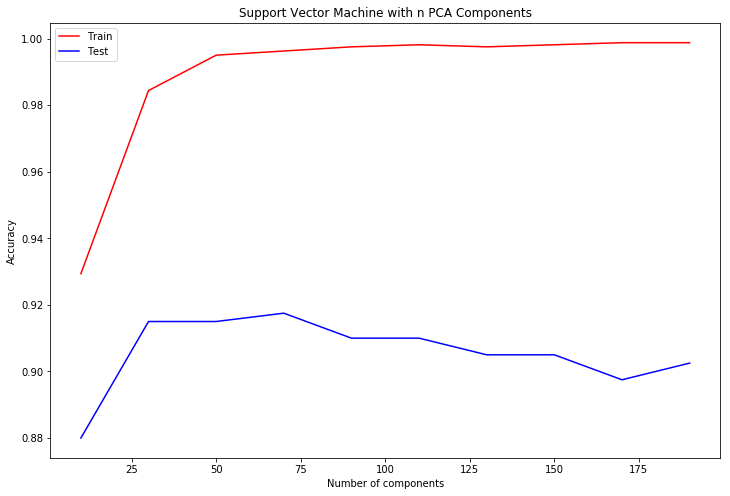

In [39]:
fig,axes = plt.subplots(figsize=(12,8))


axes.plot(svm_re['Number of components'], svm_re['Score on training data'], 'r',label='Train')
axes.set_xlabel('Number of components')
axes.set_ylabel('Accuracy')
axes.plot(svm_re['Number of components'], svm_re['Score on test data'], 'b',label='Test')
axes.legend()
axes.set_title('Support Vector Machine with n PCA Components')




### Preview 4: Grid Search

For each model, there are parameters to be set, sometimes, these parameters have great impact on the resulting accuracy.
We can use grid search to automate the selection of parameters in some cases.

In [40]:
from sklearn.model_selection import GridSearchCV

svc=SVC()

parameters={'gamma':[0.001,0.01,0.1,1,10,100], 'C':[0.001,0.01,0.1,1, 10,100]}
clf = GridSearchCV(svc, parameters)

pca = PCA(n_components=30, whiten=True)
pca.fit(X_train)
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

clf.fit(X_train_pca,y_train)

print('The accuracy  on train data is {0}, and {1} on test dataset.'.format(clf.score(X_train_pca,y_train),clf.score(X_test_pca,y_test)))

print('The best parameters are: {0}'.format(clf.best_params_))

The accuracy  on train data is 0.991875, and 0.92 on test dataset.
The best parameters are: {'C': 10, 'gamma': 0.01}


### GridSearch with 5-fold cross validation

In [41]:
svc=SVC()

parameters={'gamma':[0.001,0.01,0.1,1,10,100], 'C':[0.001,0.01,0.1,1, 10,100]}
clf = GridSearchCV(svc, parameters,cv=5)

pca = PCA(n_components=30, whiten=True)
pca.fit(X_train)
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

clf.fit(X_train_pca,y_train)

print('The accuracy  on train data is {0}, and {1} on test dataset.'.format(clf.score(X_train_pca,y_train),clf.score(X_test_pca,y_test)))

print('The best parameters are: {0}'.format(clf.best_params_))

The accuracy  on train data is 0.991875, and 0.92 on test dataset.
The best parameters are: {'C': 10, 'gamma': 0.01}


## Remember, you use only 2,000 sample from 42,000 samples!

Now, please go back the very beginning, and change the number of sample to be used into 4,000 (still a small portion of the whole dataset), and repeat all the steps you have tried, and find out how much the performance (accuracy rate) of the models have been changed.

Before you repeat all the steps from above, copy the results from 2000 samples and save in a file, or save in a pd dataframe with different names.